# Nyquist Plot

The data range for the data and the corresponding classes with the number of data points within each are:
1. 20Hz to 1MHz - Frooti(120), PaperBoat(88) - r1_ip.csv
2. 100Hz to 1MHz - Maza(68), Real Juice(80) - r2_ip.csv

It is necassary to see the nyquist plots for the following.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Your files ---
files = ["r1_ip.csv", "r2_ip.csv"]
class_ranges = {
    "Frooti (r1)": range(1, 120),   # Example: samples 1–34
    "PaperBoat (r1)": range(121, 208),  # Example: samples 35–68
    "Maza (r2)": range(1, 68),   # Example: samples 1–34
    "RealJuice (r2)": range(69, 148)   # Example: samples 35–68
}


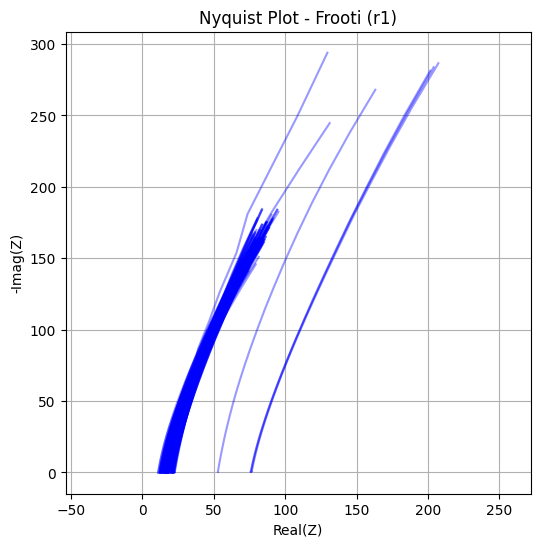

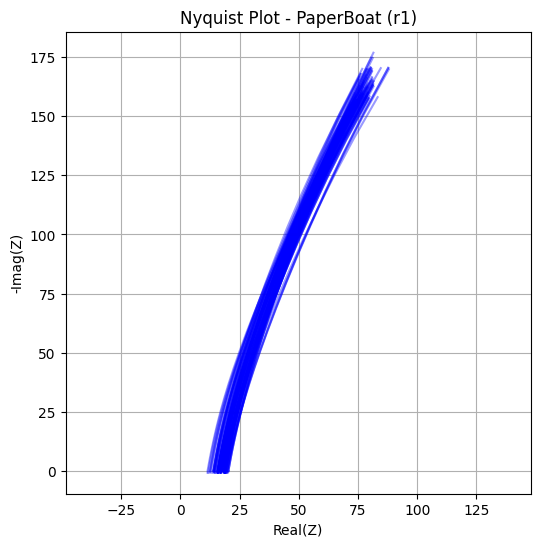

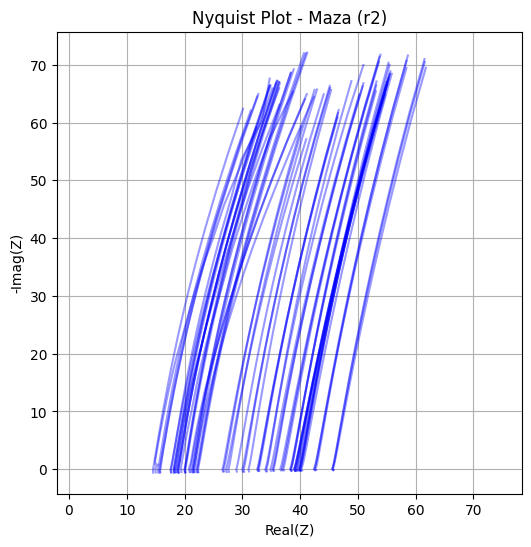

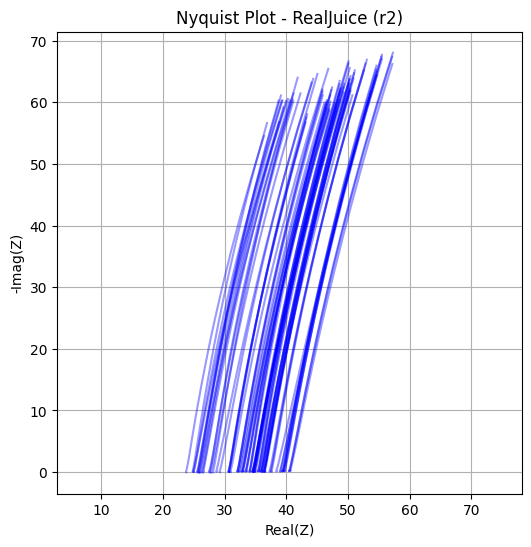

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Your files ---
files = ["r1_ip.csv", "r2_ip.csv"]

# --- Class ranges (you define manually, row indices are sample IDs) ---
class_ranges = {
    "Frooti (r1)": range(1, 121),
    "PaperBoat (r1)": range(121, 209),
    "Maza (r2)": range(1, 69),
    "RealJuice (r2)": range(69, 149)
}

# --- Loop over files ---
for file_idx, file in enumerate(files):
    df = pd.read_csv(file, header=None)   # no headers
    data = df.values                      # numpy array for speed
    
    # --- Loop over classes in this file ---
    for class_name, sample_range in class_ranges.items():
        if f"r{file_idx+1}" in class_name:   # belongs to this file
            plt.figure(figsize=(6,6))
            
            # loop through sample IDs in this class
            for sample_id in sample_range:
                # pick rows where first col == sample_id
                rows = data[data[:,0] == sample_id]
                
                if rows.shape[0] == 2:  # should have 2 rows (Real & Imag)
                    real_row = rows[0, 2:].astype(float)   # row 1 from col 2 onwards
                    imag_row = rows[1, 2:].astype(float)   # row 2 from col 2 onwards
                    
                    plt.plot(real_row, -imag_row, alpha=0.4, color="blue")
            
            plt.xlabel("Real(Z)")
            plt.ylabel("-Imag(Z)")
            plt.title(f"Nyquist Plot - {class_name}")
            plt.grid(True)
            plt.axis("equal")
            plt.show()


# Plotting Nyquist Based on Time-stamps

The above data is for all the times stamps included,
some observations can be made:
1. The Nyquist Plot for PaperBoat is least deviated as compared to the rest.
2. Nyquist Plots for Frooti stands next in terms of least deviation, though we see some wierd behaviour in some curves.This could be becaue of outliers present.
3. The plots for Maza is the most deviated.

Better analysis of the above can be based on the plotting wth different coloours based on the different timestamps.



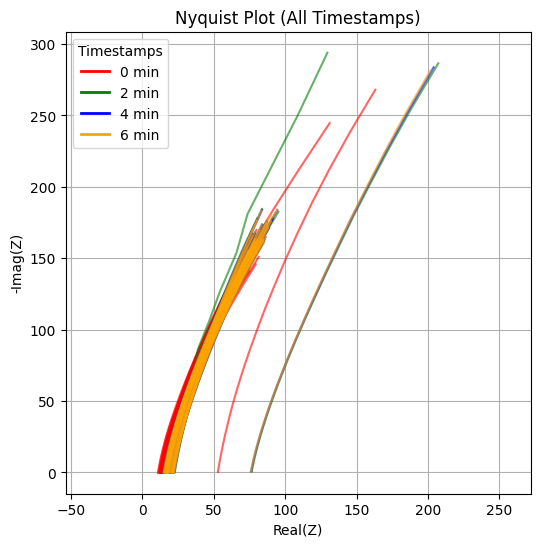

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Files for each timestamp
files = {
    "0 min": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split/t10F.csv",
    "2 min": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split/t12F.csv",
    "4 min": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split/t14F.csv",
    "6 min": "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split/t16F.csv"
}

# Colors for each timestamp
colors = ["red", "green", "blue", "orange"]

plt.figure(figsize=(6,6))

for (label, file), color in zip(files.items(), colors):
    df = pd.read_csv(file, header=None)
    data = df.values
    
    # Get unique sample IDs from first column
    sample_ids = pd.unique(data[:, 0])
    
    for s in sample_ids:
        # get all rows for this sample ID
        rows = data[data[:, 0] == s]
        
        if rows.shape[0] != 2:
            print(f"Sample {s} has {rows.shape[0]} rows (expected 2)")
            continue
        
        real_row = rows[0, 4:].astype(float)  # skip first column
        imag_row = rows[1, 4:].astype(float)
        
        plt.plot(real_row, -imag_row, color=color, alpha=0.6)

# Custom legend
legend_handles = [Line2D([0], [0], color=c, lw=2, label=l) for c, l in zip(colors, files.keys())]
plt.legend(handles=legend_handles, title="Timestamps")

plt.xlabel("Real(Z)")
plt.ylabel("-Imag(Z)")
plt.title("Nyquist Plot (All Timestamps)")
plt.grid(True)
plt.axis("equal")
plt.show()

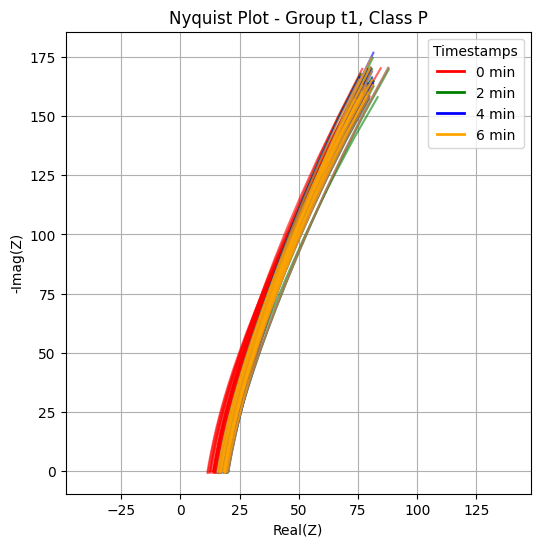

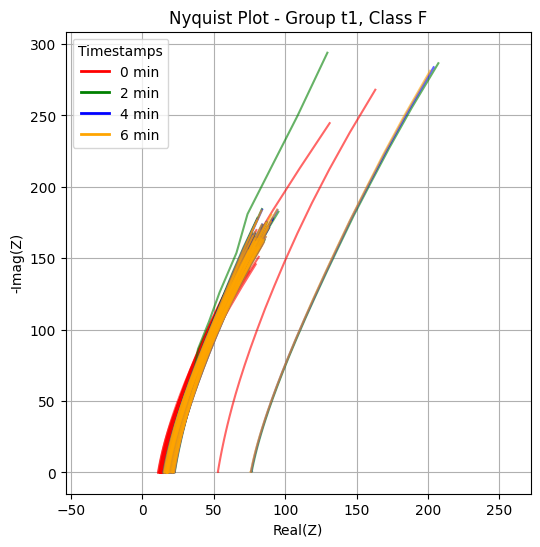

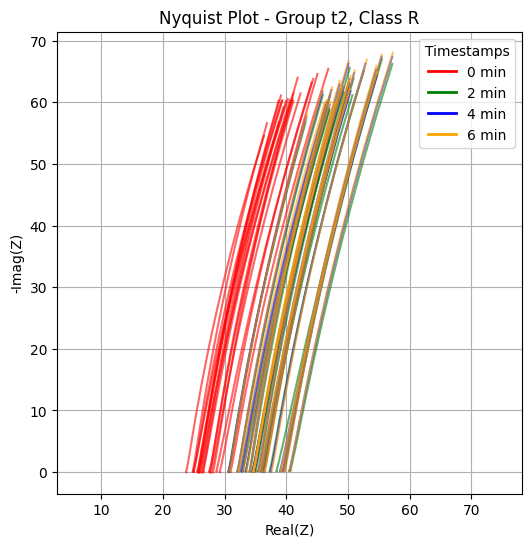

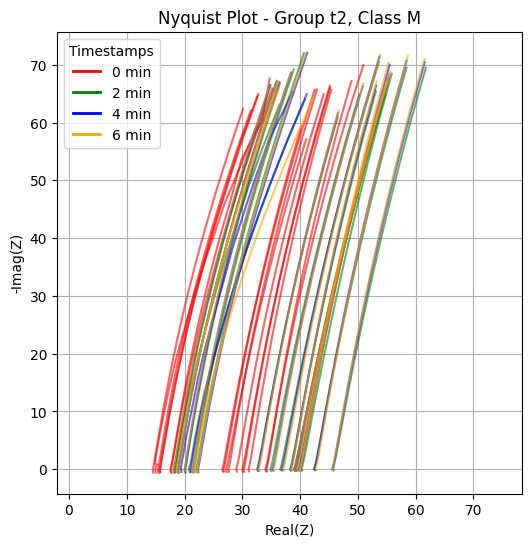

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import re

# --- Folder where all split CSVs are stored ---
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split"

# --- Colors for timestamps ---
colors = ["red", "green", "blue", "orange"]
timestamp_labels = ["0 min", "2 min", "4 min", "6 min"]

# --- Get all CSV files in folder ---
all_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# --- Group files by t1/t2 prefix ---
groups = {}
for f in all_files:
    match = re.match(r"(t\d+)([A-Z])\.csv", f, re.IGNORECASE)
    if match:
        tpart, cls = match.groups()
        cls = cls.upper()
        group_prefix = tpart[0:2]  # 't1' or 't2'
        if group_prefix not in groups:
            groups[group_prefix] = {}
        if cls not in groups[group_prefix]:
            groups[group_prefix][cls] = []
        groups[group_prefix][cls].append(f)

# --- Sort files within each class by numeric part of timestamp ---
for group in groups:
    for cls in groups[group]:
        groups[group][cls].sort(key=lambda x: int(re.findall(r"\d+", x)[0]))

# --- Loop over each group (t1, t2) ---
for group_prefix, classes in groups.items():
    for cls, files_for_class in classes.items():
        plt.figure(figsize=(6,6))
        
        for idx, file in enumerate(files_for_class):
            df = pd.read_csv(os.path.join(folder, file), header=None)
            data = df.values
            sample_ids = pd.unique(data[:, 0])
            
            for s in sample_ids:
                rows = data[data[:, 0] == s]
                if rows.shape[0] != 2:
                    continue  # skip if not exactly 2 rows (Real/Imag)
                
                real_row = rows[0, 4:].astype(float)
                imag_row = rows[1, 4:].astype(float)
                
                plt.plot(real_row, -imag_row, color=colors[idx % len(colors)], alpha=0.6)
        
        # Custom legend for timestamps
        legend_handles = [Line2D([0], [0], color=c, lw=2, label=l) for c, l in zip(colors, timestamp_labels)]
        plt.legend(handles=legend_handles, title="Timestamps")
        
        plt.xlabel("Real(Z)")
        plt.ylabel("-Imag(Z)")
        plt.title(f"Nyquist Plot - Group {group_prefix}, Class {cls}")
        plt.grid(True)
        plt.axis("equal")
        plt.show()


The above are 4 plots for 4 classes - P, F, R and M. The different colours represent 4 different time stamps of the data being taken. 

Note:
1. The data is recorded over different range of frequencies, though the ranges are overlapping. One range is 20Hz to 1MHz for classes Frooti and PaperB, but range is 100Hz to 1MHz for classes Maza and RealJuice.
2. However, you can see the heights of the plot. The data with higher frequencies have higher impedance values recorded, in such cases the height of the plot is around 250 units (F, P). But for smaller ranges, the height is lower (M, R). So valid comparison of the data would be in the lower half of the plots. 

# Comparison within same timestamps but different classes



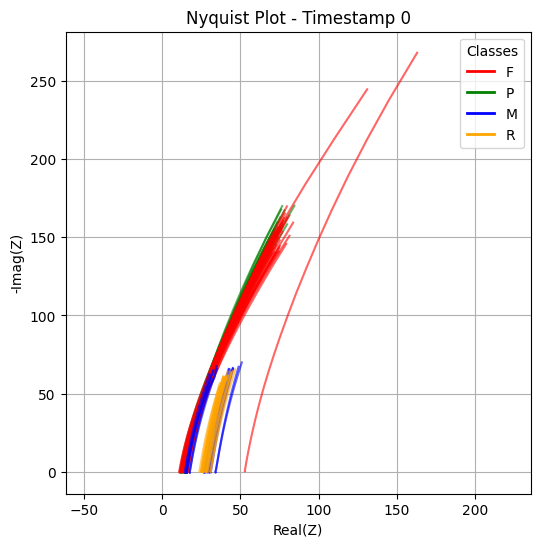

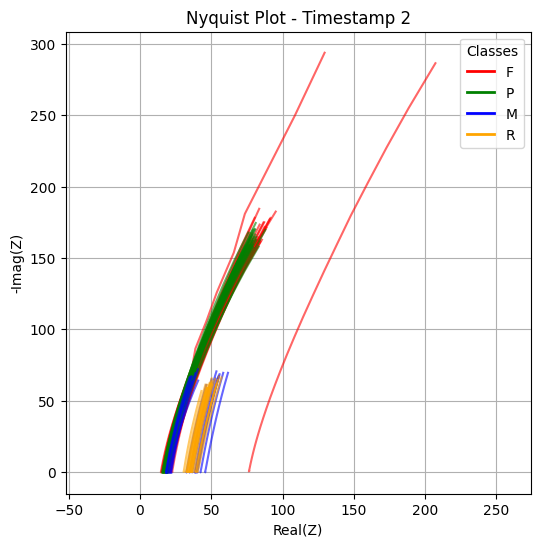

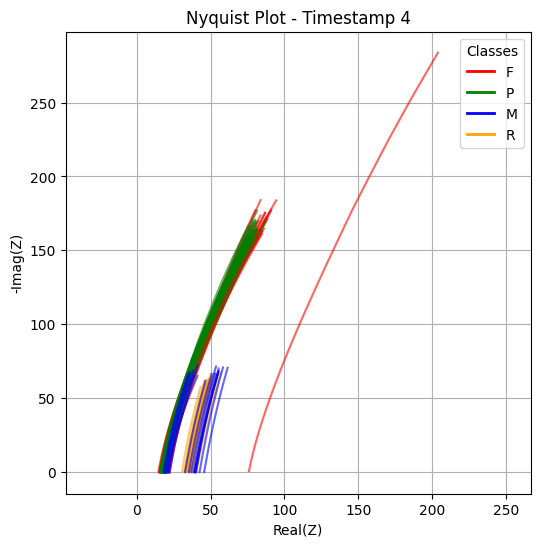

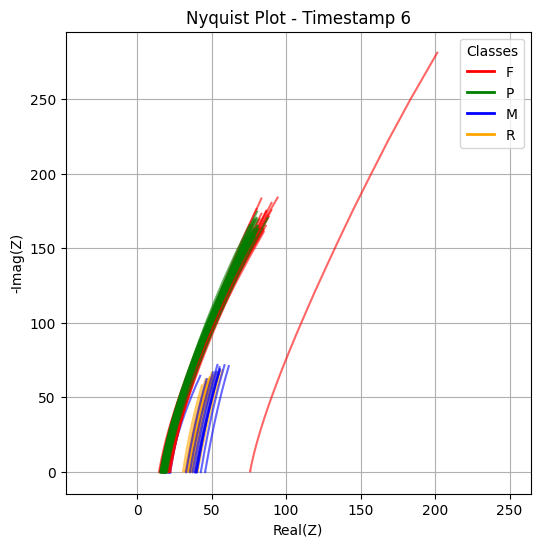

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import re

# --- Folder where CSVs are stored ---
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/split"

# Colors for classes
class_colors = {"F": "red", "P": "green", "M": "blue", "R": "orange"}

# --- Get all CSV files ---
all_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# --- Group files by timestamp number (last digit of t10, t12, etc.) ---
timestamp_map = {}  # key = 0, 2, 4, 6 -> list of files
for f in all_files:
    match = re.match(r"t\d+([0-9])([A-Z])\.csv", f, re.IGNORECASE)
    if match:
        time_digit, cls = match.groups()
        cls = cls.upper()
        time_digit = int(time_digit)
        if time_digit not in timestamp_map:
            timestamp_map[time_digit] = []
        timestamp_map[time_digit].append((cls, f))

# --- Loop over timestamps (0,2,4,6) ---
for timestamp in sorted(timestamp_map.keys()):
    plt.figure(figsize=(6,6))
    
    files_for_timestamp = timestamp_map[timestamp]
    
    for cls, file in files_for_timestamp:
        df = pd.read_csv(os.path.join(folder, file), header=None)
        data = df.values
        sample_ids = pd.unique(data[:, 0])
        
        for s in sample_ids:
            rows = data[data[:, 0] == s]
            if rows.shape[0] != 2:
                continue
            real_row = rows[0, 4:].astype(float)
            imag_row = rows[1, 4:].astype(float)
            plt.plot(real_row, -imag_row, color=class_colors.get(cls, "black"), alpha=0.6)
    
    # Legend for classes
    legend_handles = [Line2D([0], [0], color=c, lw=2, label=l) for l, c in class_colors.items()]
    plt.legend(handles=legend_handles, title="Classes")
    
    plt.xlabel("Real(Z)")
    plt.ylabel("-Imag(Z)")
    plt.title(f"Nyquist Plot - Timestamp {timestamp}")
    plt.grid(True)
    plt.axis("equal")
    plt.show()


# Adultereated Juice Samples 

We have made changes to the compositon of the subject fruit juices by:
a. adding 25% sugar, or
b. adding 16.667% Sugar + 16.667% water

The resulting data has been preprocessed and we need to study the changes on the nyquist plot of it all.

## Paper Boat and Frooti Samples Samples
Below is a comparison of the Nyquist plot of the 3 different PaperBoat samples- original(Pt), sugar mixed(_s) and water and sugar mixed(_w) and 3 different Frooti samples of the same format.

In [17]:
all_files = [f for f in os.listdir(folder) if re.match(r"t\d+\.csv", f)]
print("Files detected:", len(all_files))
print(all_files[:10])  # show first 10 for sanity


Files detected: 4
['t32.csv', 't34.csv', 't30.csv', 't36.csv']


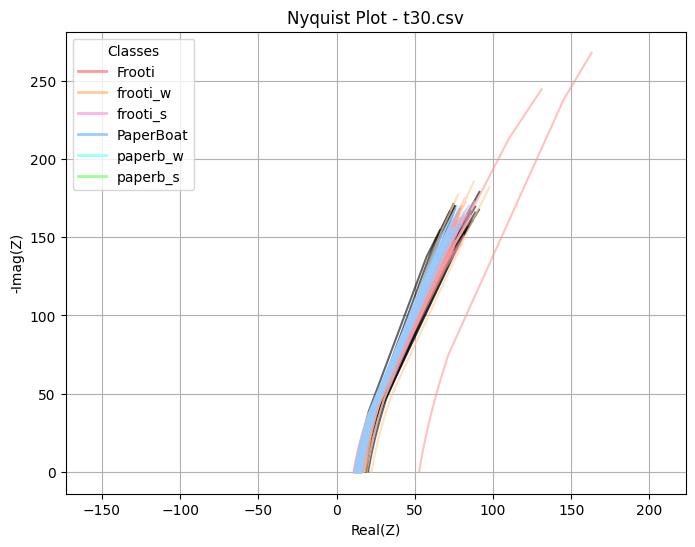

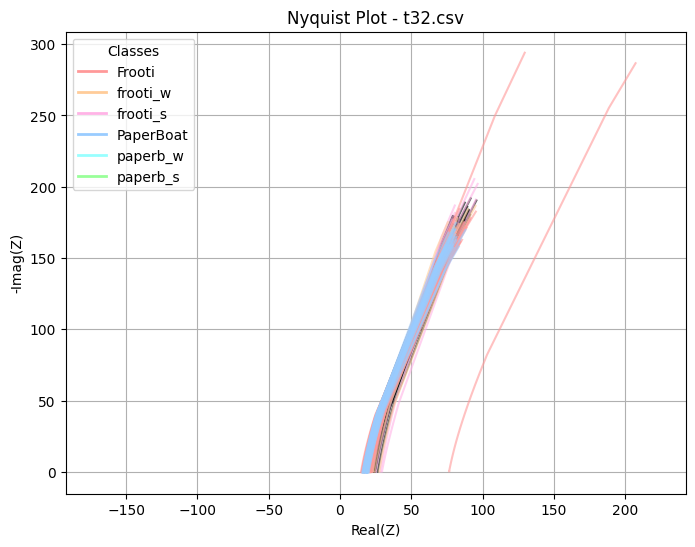

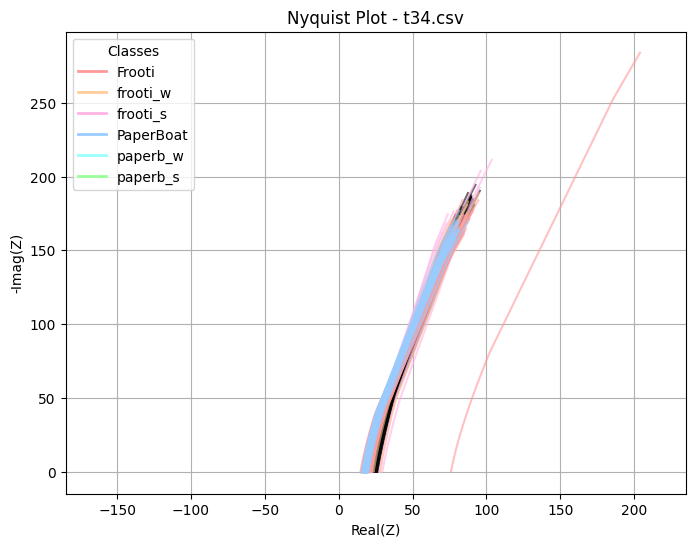

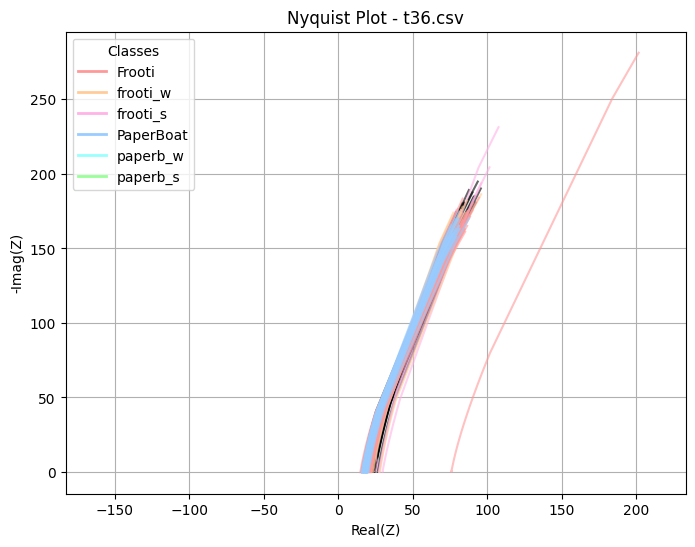

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Folder where CSVs are stored ---
folder = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/alt_data"

# --- CSV filenames ---
csv_files = ["t30.csv", "t32.csv", "t34.csv", "t36.csv"]  # replace with your 4 csvs

# --- Classes and colors ---
class_colors = {
    "Frooti": "#ff9999", 
    "frooti_w": "#ffcc99", 
    "frooti_s": "#ffb3e6",
    "PaperBoat": "#99ccff", 
    "paperb_w": "#99ffff", 
    "paperb_s": "#99ff99"
}

for file in csv_files:
    df = pd.read_csv(os.path.join(folder, file), header=None).values  # no header

    sample_ids = pd.unique(df[:, 0])  # first column = sample ID

    plt.figure(figsize=(8,6))

    for s in sample_ids:
        rows = df[df[:, 0] == s]  # get rows for this sample
        if rows.shape[0] != 2:
            continue  # skip if not exactly 2 rows (real+imag)

        real_row = rows[0, 4:].astype(float)  # columns from 4 onwards = data
        imag_row = rows[1, 4:].astype(float)

        cls = str(rows[0, 3]).strip()  # class name in column 3

        plt.plot(real_row, -imag_row, color=class_colors.get(cls, "black"), alpha=0.6)

    # Create legend
    legend_handles = [Line2D([0],[0], color=c, lw=2, label=l) for l,c in class_colors.items()]
    plt.legend(handles=legend_handles, title="Classes")

    plt.xlabel("Real(Z)")
    plt.ylabel("-Imag(Z)")
    plt.title(f"Nyquist Plot - {file}")
    plt.grid(True)
    plt.axis("equal")
    plt.xlim(0, 50)
    plt.show()


# Graduation with time, for 4 different classes

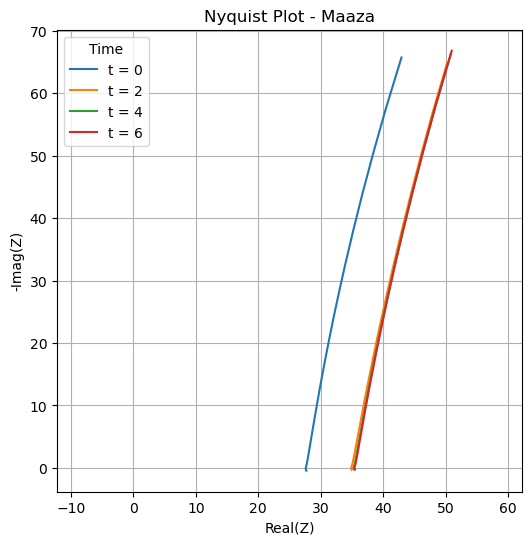

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your CSV ---
file1 = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/r1/t12_t.csv"
file2 = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/r2/t22.csv"
df = pd.read_csv(file)

# --- Column index where 't' is stored ---
t_col = 1   # change if 't' is in a different position (0-based)

plt.figure(figsize=(6,6))

for i in range(8, 16, 2):  # 4 curves (2 rows each)
    real_row = df.iloc[i, 4:4+51].astype(float).values
    imag_row = df.iloc[i+1, 4:4+51].astype(float).values
    
    t_value = df.iloc[i, t_col]  # time from metadata
    
    plt.plot(real_row, -imag_row, label=f"t = {t_value}")

plt.xlabel("Real(Z)")
plt.ylabel("-Imag(Z)")
plt.title("Nyquist Plot - Maaza")
plt.legend(title="Time")
plt.grid(True)
plt.axis("equal")
# plt.autoscale(enable=True, axis='x', tight=False)
# plt.margins(x=0.8, y = 0.2)
plt.xlim(-10, 60)
plt.show()


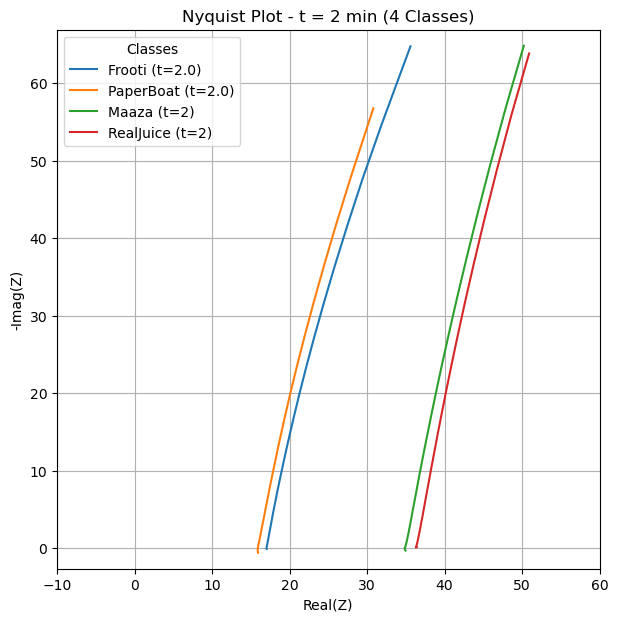

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# --- File locations ---
file1 = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/r1/t12_t.csv"
file2 = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/r2/t22.csv"

# --- Load CSVs ---
df1 = pd.read_csv(file1, header = None)
df2 = pd.read_csv(file2, header = None)

# --- Column index where 't' is stored ---
t_col = 1   # adjust if needed

# --- Class info: (dataframe, start_row, class_name) ---
class_info = [
    (df1, 0, "Frooti"),   # pick 288–289 for real/imag
    (df1, 84, "PaperBoat"),   # pick 296–297
    (df2, 2, "Maaza"),   # pick 100–101
    (df2, 66, "RealJuice")    # pick 108–109
]

plt.figure(figsize=(7,7))

for df, start_row, class_name in class_info:
    # real & imag rows
    real_row = df.iloc[start_row, 4:4+51].astype(float).values
    imag_row = df.iloc[start_row+1, 4:4+51].astype(float).values
    
    # get timestamp
    t_value = df.iloc[start_row, t_col]
    
    # plot
    plt.plot(real_row, -imag_row, label=f"{class_name} (t={t_value})")

plt.xlabel("Real(Z)")
plt.ylabel("-Imag(Z)")
plt.title("Nyquist Plot - t = 2 min (4 Classes)")
plt.legend(title="Classes")
plt.grid(True)
plt.axis("equal")
plt.xlim(-10, 60)
plt.show()


## Adulterated Data

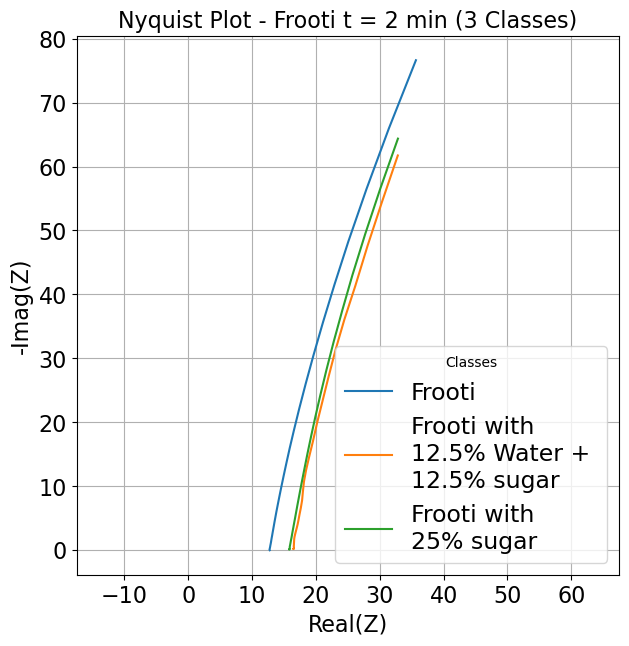

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# --- File locations ---
file1 = "/home/raginivi/Desktop/Fruit_Brand_Classification/Real_IMag/alt_data/r3_ip_t.csv"
# file2 = "/home/raginivi/Desktop/IDP_Juice_Classification/FruitBrandClassification/Real_IMag/r2/t22.csv"

# --- Load CSVs ---
df1 = pd.read_csv(file1)
# df2 = pd.read_csv(file2, header = None)

# --- Column index where 't' is stored ---
t_col = 1   # adjust if needed

# --- Class info: (dataframe, start_row, class_name) ---
class_info = [
    (df1, 248, "Frooti"),   # pick 288–289 for real/imag
    (df1, 192, "Frooti with \n12.5% Water + \n12.5% sugar"),   # pick 296–297
    (df1, 136, "Frooti with \n25% sugar")
]

plt.figure(figsize=(7,7))

for df, start_row, class_name in class_info:
    # real & imag rows
    real_row = df.iloc[start_row, 4:4+51].astype(float).values
    imag_row = df.iloc[start_row+1, 4:4+51].astype(float).values
    
    # get timestamp
    t_value = df.iloc[start_row, t_col]
    
    # plot
    plt.plot(real_row, -imag_row, label=f"{class_name}")

plt.xlabel("Real(Z)", fontsize=16)
plt.ylabel("-Imag(Z)", fontsize=16)
plt.title("Nyquist Plot - Frooti t = 2 min (3 Classes)", fontsize=16)
plt.legend(title="Classes", fontsize=17)
plt.grid(True)
plt.axis("equal")
plt.xlim(-10, 60)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


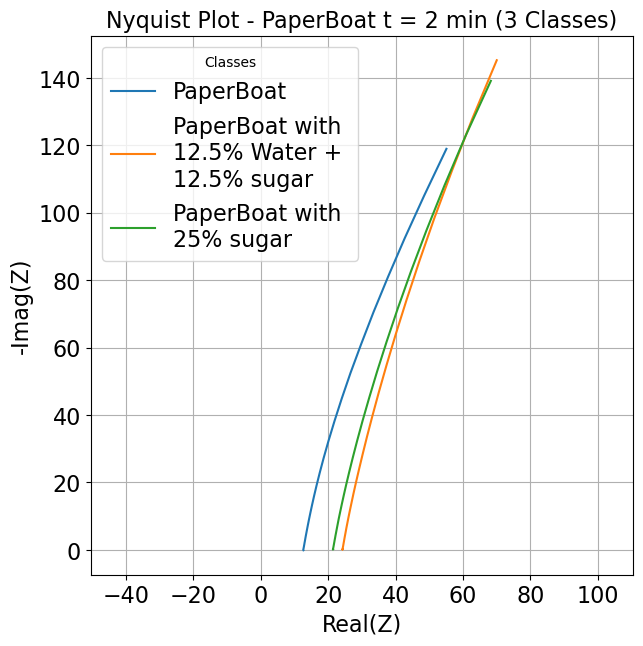

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# --- File locations ---
file1 = "/home/raginivi/Desktop/Fruit_Brand_Classification/r3_ip.csv"
# file2 = "/home/raginivi/Desktop/FruitBrandClassification/Real_IMag/r2/t22.csv"

# --- Load CSVs ---
df1 = pd.read_csv(file1)
# df2 = pd.read_csv(file2, header = None)

# --- Column index where 't' is stored ---
t_col = 1   # adjust if needed

# --- Class info: (dataframe, start_row, class_name) ---
class_info = [
    (df1, 495, "PaperBoat"),   # pick 288–289 for real/imag
    (df1, 73, "PaperBoat with \n12.5% Water + \n12.5% sugar"),   # pick 296–297
    (df1, 9, "PaperBoat with \n25% sugar")]

plt.figure(figsize=(7,7))

for df, start_row, class_name in class_info:
    # real & imag rows
    real_row = df.iloc[start_row, 4:4+51].astype(float).values
    imag_row = df.iloc[start_row+1, 4:4+51].astype(float).values
    
    # get timestamp
    t_value = df.iloc[start_row, t_col]
    
    # plot
    plt.plot(real_row, -imag_row, label=f"{class_name}")

plt.xlabel("Real(Z)", fontsize=16)
plt.ylabel("-Imag(Z)", fontsize=16)
plt.title("Nyquist Plot - PaperBoat t = 2 min (3 Classes)", fontsize=16)
plt.legend(title="Classes", fontsize=16)
plt.grid(True)
plt.axis("equal")
plt.xlim(0, 60)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


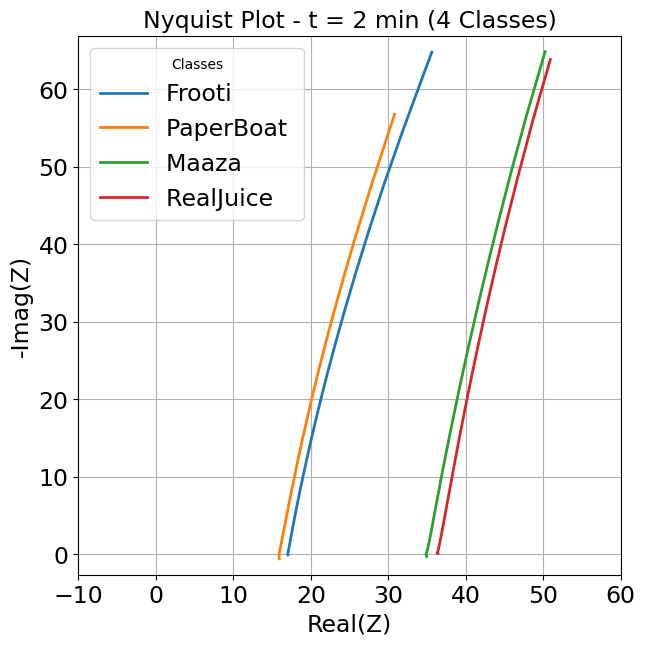

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# --- File locations ---
file1 = "/home/raginivi/Desktop/Fruit_Brand_Classification/Real_IMag/r1/t12_t.csv"
file2 = "/home/raginivi/Desktop/Fruit_Brand_Classification/Real_IMag/r2/t22.csv"

# --- Load CSVs ---
df1 = pd.read_csv(file1, header = None)
df2 = pd.read_csv(file2, header = None)

# --- Column index where 't' is stored ---
t_col = 1   # adjust if needed

# --- Class info: (dataframe, start_row, class_name) ---
class_info = [
    (df1, 0, "Frooti"),   # pick 288–289 for real/imag
    (df1, 84, "PaperBoat"),   # pick 296–297
    (df2, 2, "Maaza"),   # pick 100–101
    (df2, 66, "RealJuice")    # pick 108–109
]

plt.figure(figsize=(7,7))

for df, start_row, class_name in class_info:
    # real & imag rows
    real_row = df.iloc[start_row, 4:4+51].astype(float).values
    imag_row = df.iloc[start_row+1, 4:4+51].astype(float).values
    
    # get timestamp
    t_value = df.iloc[start_row, t_col]
    
    # plot
    plt.plot(real_row, -imag_row, label=f"{class_name} "
    # (t={t_value})"
             , linewidth=2)

plt.xlabel("Real(Z)", fontsize=17)
plt.ylabel("-Imag(Z)",fontsize=17)
plt.title("Nyquist Plot - t = 2 min (4 Classes)", fontsize=17)
plt.legend(title="Classes", fontsize=17)
plt.grid(True)
plt.axis("equal")
plt.xlim(-10, 60)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()
